In [64]:
X = np.array([[0,0,1], [0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0,0,1,1]]).T

print("入力：", X.shape)
print("重み：", X.T.shape)

入力： (4, 3)
重み： (3, 4)


In [67]:

class nn():
    def __init__(self, input_size, output_size, weight_init_std=0.01):
        self.W0 = weight_init_std * np.random.randn(input_size, output_size)
        self.b0 = np.zeros(output_size)

    def nonlin(x,deriv=False):
        if(deriv==True): #backprop用
            return x*(1-x) #微分したシグモイド　http://nonbiri-tereka.hatenablog.com/entry/2014/06/30/134023
        return 1/(1+np.exp(-x)) 

    def main(self):
        for iter in range(500):
            l0 = X
            np.dot(l0, self.W0) + self.b0
            l1 = nonlin(np.dot(l0, self.W0))
            if (iter% 100) == 0:
                grad1_list.append(nonlin(l1,True)[0][0])
                grad2_list.append(nonlin(l1,True)[1][0])
            l1_error = y - l1
            if (iter% 100) == 0:
                l1_error_list.append(l1_error)

            l1_delta = l1_error * nonlin(l1,True)
            self.W0 += np.dot(l0.T,l1_delta)
        print("Output After Training:")

In [68]:
_nn = nn(X.shape[0], 2)
# _nn.init_weight()
_nn.main()

ValueError: shapes (4,3) and (4,2) not aligned: 3 (dim 1) != 4 (dim 0)

In [25]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

grad1_list = []
grad2_list = []
l1_error_list = []
np.random.seed(1)

In [29]:
import pandas as pd
filename = 'pima-indians-diabetes.csv'
df = pd.read_csv(filename, header=0)
Y_train = df["Outcome"].values
del df["Outcome"]
X_train = df.values
print(X_train.shape)
print(Y_train.shape)
df.head(5)
W0 = 2*np.random.random((X_train.shape)) - 1
W0 = W0.T
X = X_train
y = Y_train

print("重み：", W0.shape)
print("入力：", X.shape)

(768, 8)
(768,)
重み： (8, 768)
入力： (768, 8)


In [30]:
# シグモイド 関数
def nonlin(x,deriv=False):
    if(deriv==True): #backprop用
        return x*(1-x) #微分したシグモイド　http://nonbiri-tereka.hatenablog.com/entry/2014/06/30/134023
    return 1/(1+np.exp(-x)) 

In [32]:
for iter in range(500):
    l0 = X
    l1 = nonlin(np.dot(l0,W0))
    if (iter% 100) == 0:
        grad1_list.append(nonlin(l1,True)[0][0])
        grad2_list.append(nonlin(l1,True)[1][0])
    l1_error = y - l1
    if (iter% 100) == 0:
        l1_error_list.append(l1_error)
    
    l1_delta = l1_error * nonlin(l1,True)
    W0 += np.dot(l0.T,l1_delta)
print("Output After Training:")

/Users/miyamoto/.pyenv/versions/miniconda3-4.1.11/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Output After Training:


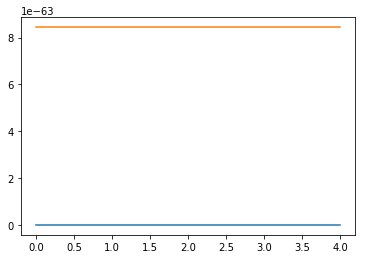

In [38]:
plt.plot(grad1_list)
plt.plot(grad2_list)

重みについて

In [36]:
W0.shape

(8, 768)

In [37]:
W0

array([[-3.95334855e-01, -2.43006456e+00, -6.03797022e-01, ...,
         6.87502939e-01,  3.04038580e+00, -1.37543100e+01],
       [-7.06488218e-01, -1.54422212e+02,  6.01489137e-01, ...,
         2.72482816e-02,  1.20613160e+02, -3.82848672e+02],
       [-8.15322810e-01, -1.00955192e+02,  9.36523151e-01, ...,
        -6.47109335e-02,  6.41606433e+01, -2.06830111e+02],
       ...,
       [-2.06465052e-01, -4.32374561e+01,  7.52778305e-01, ...,
        -6.25227656e-01,  3.29017946e+01, -1.00139952e+02],
       [ 7.76334680e-02, -5.32751727e-01,  7.89213327e-01, ...,
         4.94812201e-01,  5.63817976e-01, -7.72740261e-01],
       [-1.61610971e-01, -3.80002562e+01, -8.29911577e-01, ...,
        -6.82311180e-01,  2.58131437e+01, -1.00620890e+02]])

In [34]:
for (x, y) in zip(X_train, Y_train):
    print(x, y)
    break

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ] 1


# pima-indians-diabetes-database